In [1]:
#Import necessary libraries and tools
import pandas as pd

In [2]:
import os

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import tensorflow as tf

In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt

In C:\Users\HP\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\HP\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\HP\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\HP\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\HP\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The sav

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from sklearn.model_selection import StratifiedKFold
from keras.constraints import maxnorm
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Using TensorFlow backend.


In [6]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [7]:
#Select work directory
cwd = os.getcwd()
cwd

'C:\\Users\\HP\\Downloads\\Hamoye-Stage-B-Regression-master\\Hamoye-Stage-B-Regression-master'

In [8]:
#Import first sheet of database
data = pd.read_excel (r'C:\Users\HP\Downloads\Hamoye-Stage-B-Regression-master\Hamoye-Stage-B-Regression-master\Clipboard.xlsx')

In [9]:
#Import second sheet of database
data2 = pd.read_csv (r'C:\Users\HP\Downloads\interview_data_shifts(Elipage2.csv')

UNDERSTAND FIRST SHEET OF DATASET

In [10]:
#Find out datakeys
data.keys()

Index(['id', 'hcp_id', 'hcf_id', 'agent_type', 'charge', 'created_at',
       'shift_start', 'shift_type', 'is_cancelled', 'is_verified'],
      dtype='object')

In [11]:
#Confirm dataset content
"head:", data.head(), \
"tail:", data.tail() 

('head:',
                          id                    hcp_id  \
 0  5f18adbb6145d4001773f69f  5b5635b34afc8f0014a40433   
 1  5f18ade019ed420017bb14c3  5b5635b34afc8f0014a40433   
 2  5f18adeb19ed420017bb14c6  5b5635b34afc8f0014a40433   
 3  5f18adf43d5e0b0017498604  5b5635b34afc8f0014a40433   
 4  5f18ae003d5e0b001749860f  5b5635b34afc8f0014a40433   
 
                      hcf_id agent_type  charge created_at shift_start  \
 0  5e6662c827dbec0016767584        CNA    28.0 2020-07-22  2020-08-17   
 1  5e6662c827dbec0016767584        CNA    28.0 2020-07-22  2020-08-24   
 2  5e6662c827dbec0016767584        CNA    28.0 2020-07-22  2020-08-31   
 3  5e6662c827dbec0016767584        CNA    42.0 2020-07-22  2020-09-07   
 4  5e6662c827dbec0016767584        CNA    28.0 2020-07-22  2020-09-14   
 
   shift_type  is_cancelled  is_verified  
 0         am          True        False  
 1         am          True        False  
 2         am          True        False  
 3         am         

In [12]:
#Determine the dimensions of the data
data.shape

(3682, 10)

There are 3682 rows and 10 columns in the dataset

In [132]:
data.skew()

charge          2.431717
is_cancelled    2.029451
is_verified    -1.117973
dtype: float64

In [144]:
data.kurtosis()

charge          11.591275
is_cancelled     2.119824
is_verified     -0.750544
dtype: float64

In [13]:
#Check columns to confirm there are no errors
data.columns.values

array(['id', 'hcp_id', 'hcf_id', 'agent_type', 'charge', 'created_at',
       'shift_start', 'shift_type', 'is_cancelled', 'is_verified'],
      dtype=object)

In [14]:
#Check data types in columns
print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            3682 non-null   object        
 1   hcp_id        3682 non-null   object        
 2   hcf_id        3682 non-null   object        
 3   agent_type    3682 non-null   object        
 4   charge        3682 non-null   float64       
 5   created_at    3682 non-null   datetime64[ns]
 6   shift_start   3682 non-null   datetime64[ns]
 7   shift_type    3682 non-null   object        
 8   is_cancelled  3682 non-null   bool          
 9   is_verified   3682 non-null   bool          
dtypes: bool(2), datetime64[ns](2), float64(1), object(5)
memory usage: 237.4+ KB
None


#DATA CLEANING

In [15]:
#Check for null values
data.isnull().sum()

id              0
hcp_id          0
hcf_id          0
agent_type      0
charge          0
created_at      0
shift_start     0
shift_type      0
is_cancelled    0
is_verified     0
dtype: int64

In [16]:
missing_values = ["n/a", "na", "--"]
data = pd.read_excel (r'C:\Users\HP\Downloads\Hamoye-Stage-B-Regression-master\Hamoye-Stage-B-Regression-master\Clipboard.xlsx', na_values = missing_values)

In [17]:
data.notnull()

,id,hcp_id,hcf_id,agent_type,charge,created_at,shift_start,shift_type,is_cancelled,is_verified
0,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...
3677,True,True,True,True,True,True,True,True,True,True
3678,True,True,True,True,True,True,True,True,True,True
3679,True,True,True,True,True,True,True,True,True,True
3680,True,True,True,True,True,True,True,True,True,True


Data does not require any corrections because there are no null values. The highlighted rows are all useful as they will help to get a better in-depth analysis of the dataset. The various data types have indications that relate to various metrics for determining business growth.

In [19]:
#Gather summary statistics of the data set
data.describe()

,charge
count,3682.00000
mean,35.67391
std,13.91454
min,0.00000
25%,27.00000
50%,30.87500
75%,42.00000
max,173.50000


In [95]:
data_num = data.select_dtypes(include = 'number')

In [96]:
data_num.describe()

,charge
count,3682.00000
mean,35.67391
std,13.91454
min,0.00000
25%,27.00000
50%,30.87500
75%,42.00000
max,173.50000


The statistical summary of the entire dataset and a statistical summary of all numerical columns of the data set give the same value. Thus, there is only one numerical column in the first sheet dataset which is the 'charge'

In [20]:
#Determine groups and cohorts
data['hcp_id'].value_counts()

5deeb348e9c40c001669bde7    111
5ecdfb9e36d19b0017a0383c     82
5e1ccb1b27ff480016e90c79     82
5e011e30bede8f00164fe168     75
5e8b8f15fef72700164816c5     74
                           ... 
5dbb3b186b7c230016ab798a      1
5d07da57d8265f00160b27f5      1
5cd1dc3dbc5ca90016a07edd      1
5d5c7f975dd60b001682f1ea      1
5eb9d59cf7cd250017450236      1
Name: hcp_id, Length: 200, dtype: int64

In [21]:
data['hcf_id'].value_counts()

5eebe1ec00957c0017a41c49    401
5d446a8d8fbe1800166d8312    381
5b70ed73e318270014cd6bee    256
5f1869b56145d4001773ec6a    218
5cb9f07135163900163f532c    191
                           ... 
5e5e85ea43a2390016e3d65c      2
5ced854f08563500167fc5cf      2
5c104cc93a1cdc0004681521      1
5bf30fdfb1959c000400fa72      1
5f0e349e9f8ff000179d1288      1
Name: hcf_id, Length: 74, dtype: int64

In [23]:
#Group recurring data
data.nunique()

hcp_id          200
hcf_id           74
agent_type        6
charge          107
shift_type        5
is_cancelled      2
is_verified       2
dtype: int64

In [24]:
#Id of all Healthcare professionals
data['hcp_id'].unique()

array(['5b5635b34afc8f0014a40433', '5b6dda6d6ce3150014cc74c6',
       '5b6e37ff625376001402de0f', '5bb684553e5353000430e587',
       '5be4c820a3acae0004af0833', '5bebb6bf19a24e000424b1a0',
       '5befa1dc4665f80004b96dda', '5c199db2b3764200043df40f',
       '5c3419a5e892fd000445ecdf', '5c5df91016395e0016a28355',
       '5c66ed1aaa68330016b5f6b6', '5c882dd984e2b900160efd63',
       '5c8bf92b6b5b82001686efbd', '5c93e1c5ecf19d0016cfc94f',
       '5c93fd7becf19d0016d59f35', '5c9e270b6887970016b70670',
       '5ca25f2595280500162fe5a0', '5cab785c49428200167d2a9f',
       '5cae7a50bdfc6b0016a1f2f4', '5cb0b095cbea38001661b83f',
       '5cb74b27ddf7e90016ed77ff', '5cbe427cf7b9710016d428cb',
       '5cc0f9a88f7ec000166a2a45', '5cc8a2873af07c0016240902',
       '5cc8a7a83af07c001624fc3c', '5cd1dc3dbc5ca90016a07edd',
       '5cdc43dfbcc8e90016add274', '5cddecdb5805700016c44f04',
       '5cf573381648900016c41377', '5cf96114cf35aa0016854f8b',
       '5d01527457d52f0016322b0e', '5d027d555147290016b

There are 200 Healthcare Professionals in the dataset

In [25]:
#Id of all Healthcare facilities
data['hcf_id'].unique()

array(['5e6662c827dbec0016767584', '5bd20a2c2f1b850004d0f55e',
       '5e8dce39ee2690001638ce46', '5be0b0d2ba64030004d2117c',
       '5b70ed73e318270014cd6bee', '5bb380e8945fd200046cad4c',
       '5f2ae7490153c70016c840f5', '5f2df9b9dfb6250016bdff3c',
       '5f305015f8d05400161fa931', '5f0dd8622970920017ea19fe',
       '5d3f2859dde4300016924963', '5f1869b56145d4001773ec6a',
       '5d1f3f99339f36001533f5bb', '5f360eac17ad7e0016b977c3',
       '5f3b2d6cf76e09001623f54e', '5da66dd77f9f550016d77006',
       '5f63c06a4c6e0a0016759a7e', '5cb9f07135163900163f532c',
       '5df913b17106bf001602be38', '5e1ce78827ff480016e9133e',
       '5ebb1786087804001750a4d8', '5eebe1ec00957c0017a41c49',
       '5e8f18c7c2980b00164326a9', '5c0af282edde0b0004102048',
       '5e2119950d2c4000166d3995', '5d446a8d8fbe1800166d8312',
       '5f04de7b68380400171fd345', '5f457bca7561c300165896f8',
       '5bb27e8cc5dc8a00042e9ef9', '5e3b1adad2123d00162e7a56',
       '5f24d46f821c460016b88acb', '5c831076a08cb800167

There are 74 Healthcare facilities in the dataset

In [26]:
#Group Healthcare Professionals based on their professional expertise
data['agent_type'].unique()

array(['CNA', 'LVN', 'RN', 'Phlebotomist', 'Medical Assistant',
       'SURG TECH'], dtype=object)

In [27]:
data['agent_type'].value_counts()

CNA                  2575
LVN                   743
Medical Assistant     221
RN                    125
Phlebotomist           15
SURG TECH               3
Name: agent_type, dtype: int64

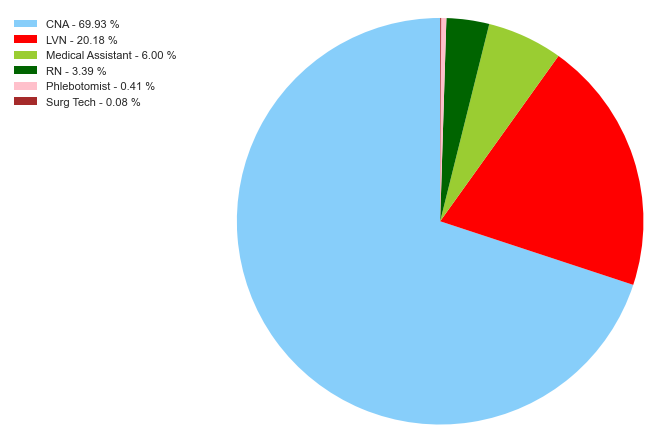

In [124]:
x = np.char.array(['CNA','LVN','Medical Assistant','RN','Phlebotomist','Surg Tech'])
y = np.array([2575, 743, 221, 125, 15, 3])
colors = ['lightskyblue', 'red', 'yellowgreen', 'darkgreen', 'pink', 'brown']
porcent = 100.*y/y.sum()
patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)

plt.savefig('piechart.png', bbox_inches='tight')

69.93 percent of the Healthcare Professionals are Certified Nursing Assistants

In [28]:
#Determine the values and most used shift timesdata['shift_type'].unique()

In [29]:
data['shift_type'].value_counts()

am        1268
noc       1098
pm         904
custom     409
surg         3
Name: shift_type, dtype: int64

Text(0, 0.5, '')

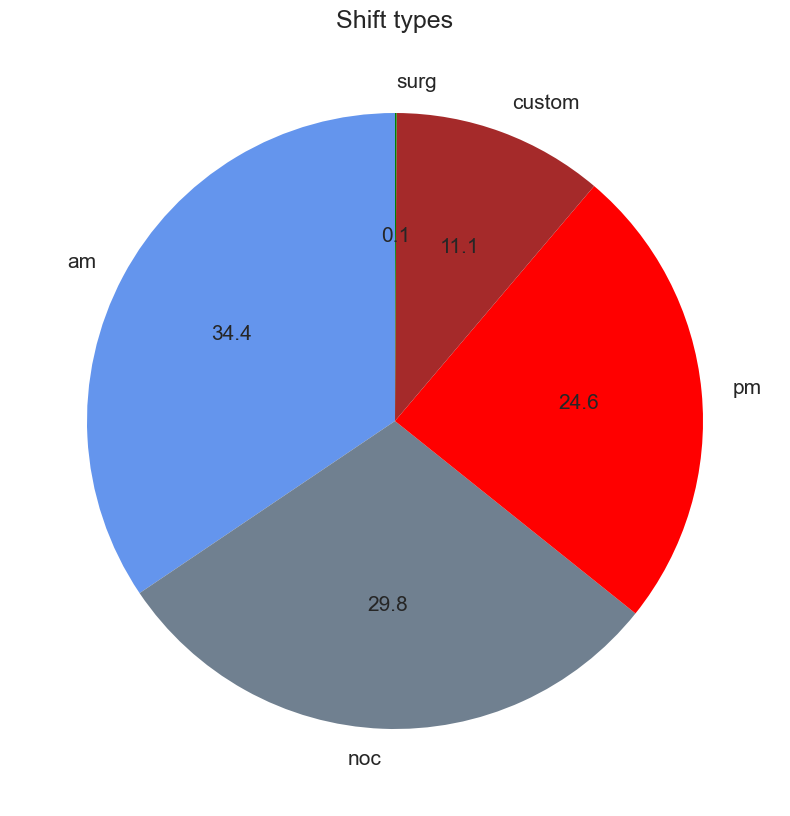

In [129]:
plt.figure(figsize=(10,10))
data['shift_type'].value_counts().plot(kind='pie',autopct='%1.1f', textprops={'fontsize': 15},startangle=90,explode =None,colors=['cornflowerblue','slategray','red','brown','green'])
plt.title('Shift types', fontsize = 18)
plt.ylabel('')

The most popular type of shift is the morning shift (am)

In [127]:
#Number of times Healthcare facilities cancelled shifts
data['is_cancelled'].value_counts()

False    3152
True      530
Name: is_cancelled, dtype: int64

Text(0, 0.5, '')

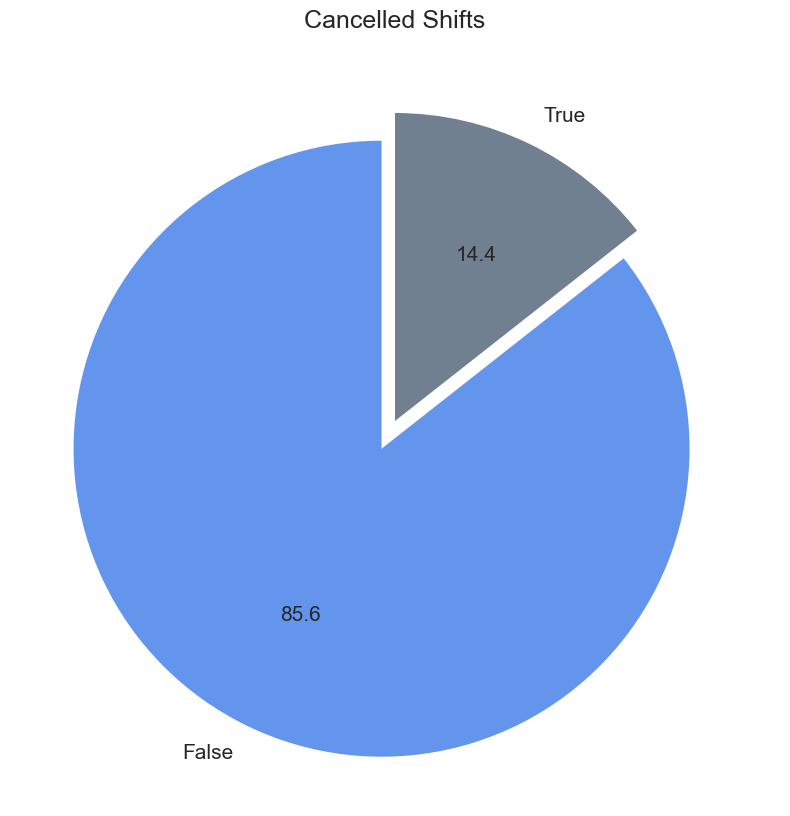

In [130]:
plt.figure(figsize=(10,10))
data['is_cancelled'].value_counts().plot(kind='pie',autopct='%1.1f', textprops={'fontsize': 15},startangle=90,explode =(0.1,0),colors=['cornflowerblue','slategray'])
plt.title('Cancelled Shifts', fontsize = 18)
plt.ylabel('')

This data shows the percentage of shifts that were booked by Healthcare professionals but were cancelled by the facilities for one reason or the other

In [31]:
#Number of completed shifts by Healthcare Professionals at the facilities
data['is_verified'].value_counts()

True     2739
False     943
Name: is_verified, dtype: int64

Text(0, 0.5, '')

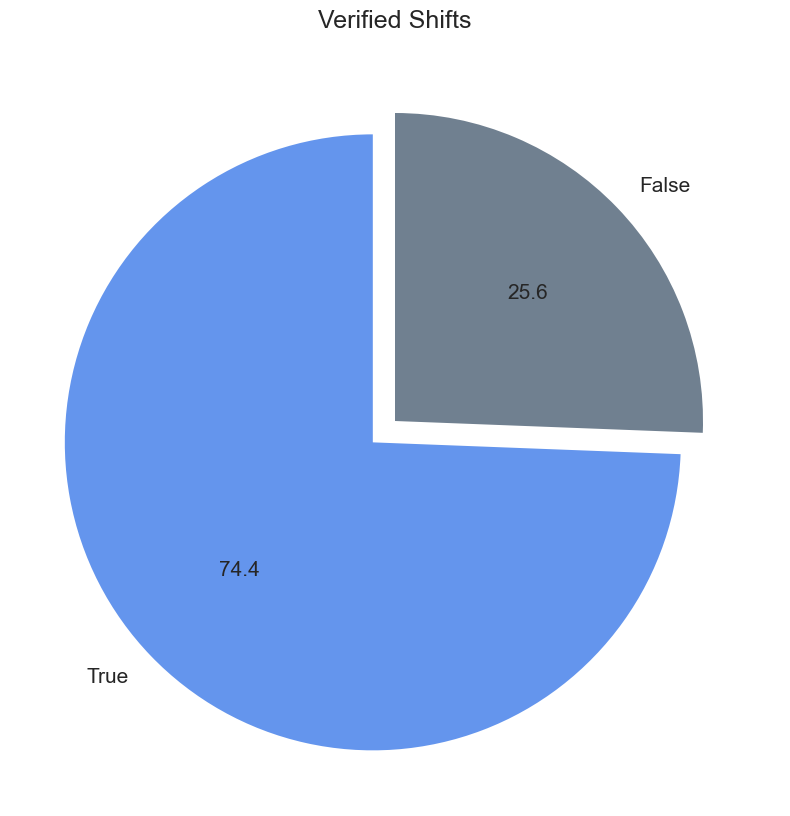

In [131]:
plt.figure(figsize=(10,10))
data['is_verified'].value_counts().plot(kind='pie',autopct='%1.1f', textprops={'fontsize': 15},startangle=90,explode =(0.1,0),colors=['cornflowerblue','slategray'])
plt.title('Verified Shifts', fontsize = 18)
plt.ylabel('')

<AxesSubplot:title={'center':'Number of HCP shifts adding Revenue'}, xlabel='is_verified', ylabel='count'>

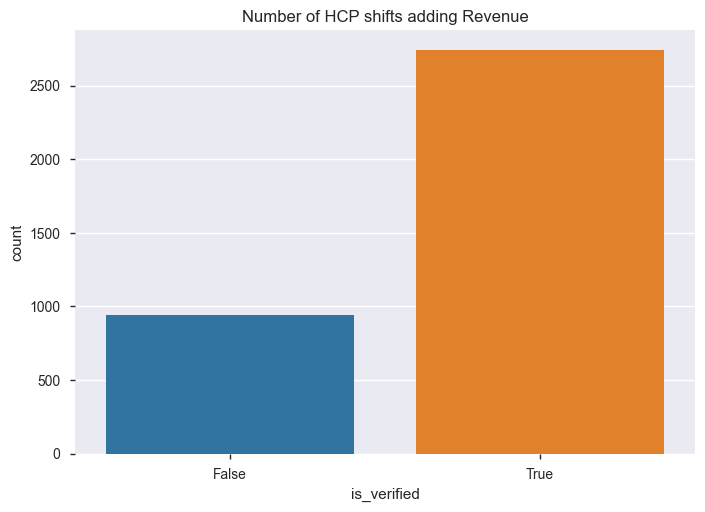

In [143]:
#Revenue calculation
plt.title('Number of HCP shifts adding Revenue')
sns.countplot(data['is_verified'])

Number of shift openings that were verified and confirmed by Healthcare Professionals and the facilities confirmed that the HCPs reported for duty and completed the shifts. This is the key metric of clipboard health as revenue is made when shiftts are booked, vompleted, verified and payment is made. 74.4 percent of all listed shifts were booked by HCPs. There is a 25.6% bounce rate which contributes to churn and user loss

UNDERSTANDING THE SECOND SHEET OF DATA

In [35]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     200 non-null    object
 1   stage                  200 non-null    object
 2   created_at             195 non-null    object
 3   last_worked            197 non-null    object
 4   completed_shifts       200 non-null    int64 
 5   attendance_percentage  200 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 9.5+ KB


In [36]:
#Find out datakeys
data2.keys()

Index(['id', 'stage', 'created_at', 'last_worked', 'completed_shifts',
       'attendance_percentage'],
      dtype='object')

In [37]:
#Confirm dataset content
"head:", data2.head(), \
"tail:", data2.tail() 

('head:',
                          id      stage created_at last_worked  \
 0  5b5635b34afc8f0014a40433   ENROLLED        NaN       06/29   
 1  5b6dda6d6ce3150014cc74c6  PROBATION      06/23       09/14   
 2  5b6e37ff625376001402de0f   ENROLLED      06/03       09/16   
 3  5bb684553e5353000430e587   ENROLLED      03/05       09/20   
 4  5be4c820a3acae0004af0833   ENROLLED        NaN       09/21   
 
    completed_shifts  attendance_percentage  
 0               177                     71  
 1                32                     76  
 2               188                     84  
 3               198                     96  
 4                39                     80  ,
 'tail:',
                            id      stage created_at last_worked  \
 195  5f4803b6c0b6bd001607cb17   ENROLLED      08/27       09/18   
 196  5f4a9a63c682c20016d922cf  PROBATION      08/29       09/17   
 197  5f4bbd29dcab30001604da6a   ENROLLED      08/30       09/18   
 198  5f57d0776ed44c001613b1d0   

In [38]:
#Determine the dimensions of the data
data.shape

(3682, 7)

#DATA CLEANING

In [39]:
#Check for null values
data2.isnull().sum()

id                       0
stage                    0
created_at               5
last_worked              3
completed_shifts         0
attendance_percentage    0
dtype: int64

In [40]:
data2.notnull()

,id,stage,created_at,last_worked,completed_shifts,attendance_percentage
0,True,True,False,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,False,True,True,True
...,...,...,...,...,...,...
195,True,True,True,True,True,True
196,True,True,True,True,True,True
197,True,True,True,True,True,True
198,True,True,True,True,True,True


There are 8 null values in the second sheet of data

In [134]:
data2.dropna()

,id,stage,created_at,last_worked,completed_shifts,attendance_percentage
1,5b6dda6d6ce3150014cc74c6,PROBATION,06/23,09/14,32,76
2,5b6e37ff625376001402de0f,ENROLLED,06/03,09/16,188,84
3,5bb684553e5353000430e587,ENROLLED,03/05,09/20,198,96
8,5c3419a5e892fd000445ecdf,ENROLLED,07/14,09/20,176,90
9,5c5df91016395e0016a28355,ENROLLED,02/08,08/09,3,60
...,...,...,...,...,...,...
195,5f4803b6c0b6bd001607cb17,ENROLLED,08/27,09/18,8,89
196,5f4a9a63c682c20016d922cf,PROBATION,08/29,09/17,1,50
197,5f4bbd29dcab30001604da6a,ENROLLED,08/30,09/18,13,100
198,5f57d0776ed44c001613b1d0,ENROLLED,09/08,09/18,3,100


In [42]:
#Exploring the second sheet
data2['stage'].unique()

array(['ENROLLED', 'PROBATION', 'Deactivated', 'SUSPENDED', 'ONBOARDING'],
      dtype=object)

In [136]:
print (data2['stage'].value_counts())

ENROLLED       152
PROBATION       29
Deactivated      9
ONBOARDING       8
SUSPENDED        2
Name: stage, dtype: int64


In [44]:
"Statistics:", data2.describe()

('Statistics:',
        completed_shifts  attendance_percentage
 count        200.000000             200.000000
 mean          65.765000              78.415000
 std           83.281202              21.758676
 min            0.000000               0.000000
 25%            6.750000              69.000000
 50%           32.000000              84.000000
 75%           94.250000              95.000000
 max          439.000000             100.000000)

The minimum number of completed shifts is 0 while the maximum number of completed shifts by an Healthcare professional is 439

DATA VISUALISATION

count    200.000000
mean      65.765000
std       83.281202
min        0.000000
25%        6.750000
50%       32.000000
75%       94.250000
max      439.000000
Name: completed_shifts, dtype: float64


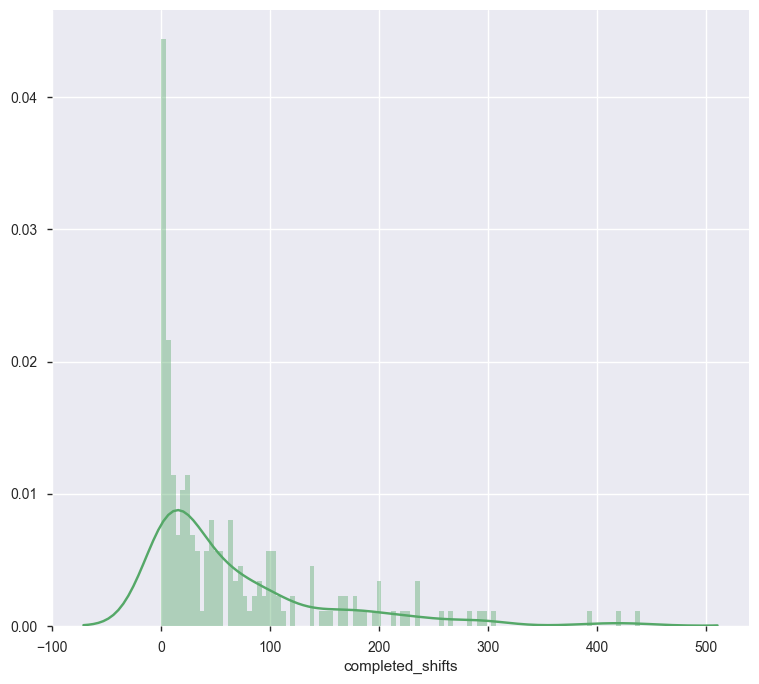

In [137]:
print(data2['completed_shifts'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(data2['completed_shifts'], color='g', bins=100, hist_kws={'alpha': 0.4});

The information for the number of completed shifts are skewed right with some outliers above 300. This will have to be trimmed to create a better distribution of the dataset

count    200.000000
mean      78.415000
std       21.758676
min        0.000000
25%       69.000000
50%       84.000000
75%       95.000000
max      100.000000
Name: attendance_percentage, dtype: float64


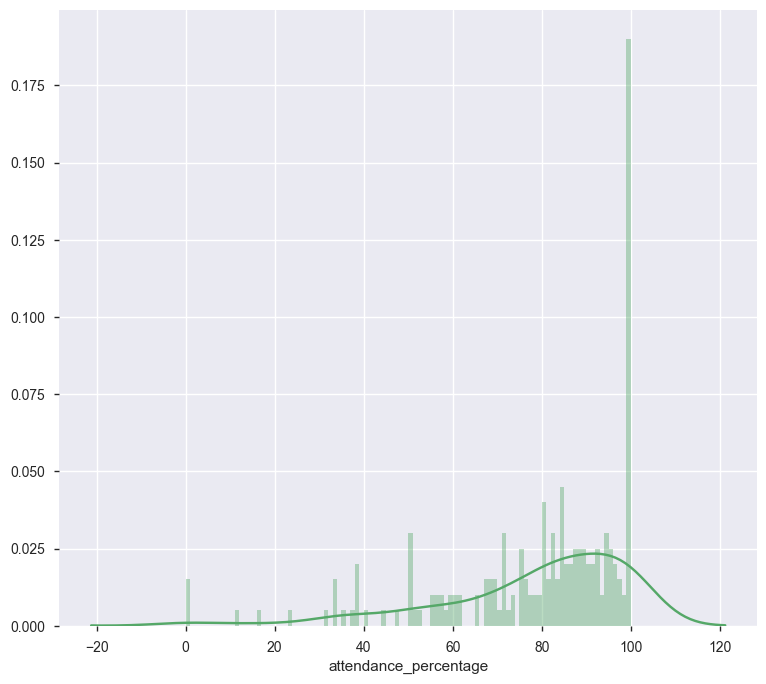

In [138]:
print(data2['attendance_percentage'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(data2['attendance_percentage'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [ ]:
The attendance data is skewed to the left with some outliers

array([[<AxesSubplot:title={'center':'attendance_percentage'}>,
        <AxesSubplot:title={'center':'completed_shifts'}>]], dtype=object)

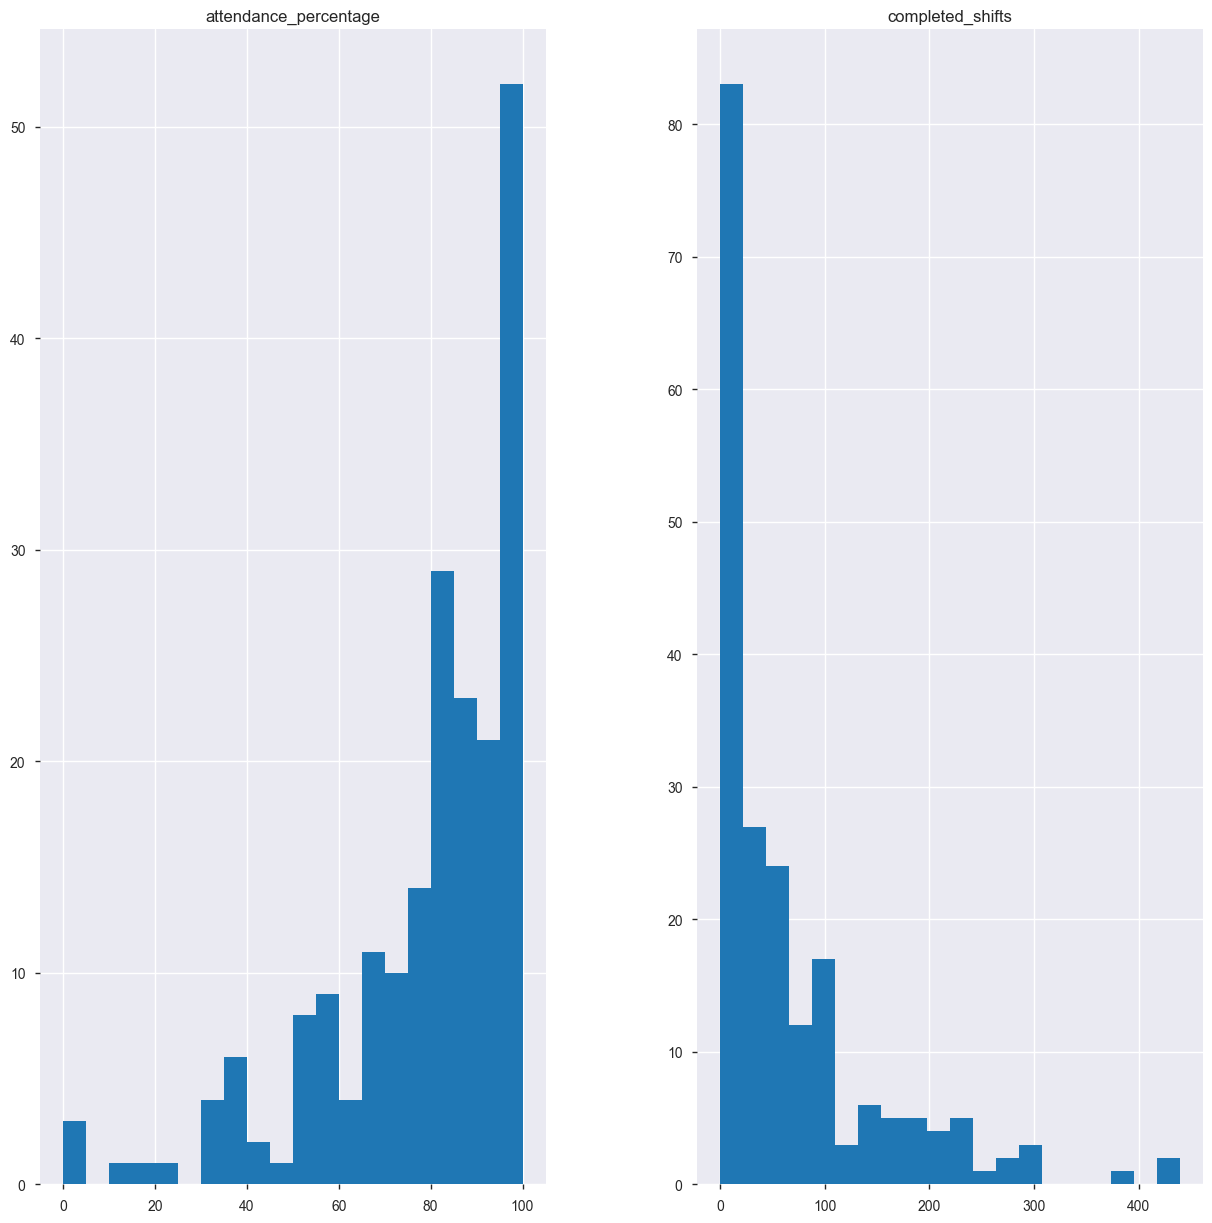

In [139]:
data2.hist(figsize=(15, 15), bins=20)

In [45]:
corelation = data.corr()

<AxesSubplot:>

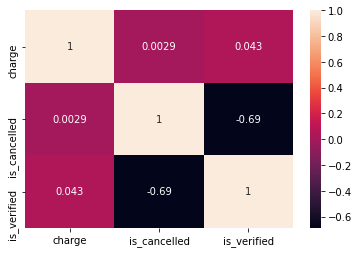

In [46]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns,annot=True)

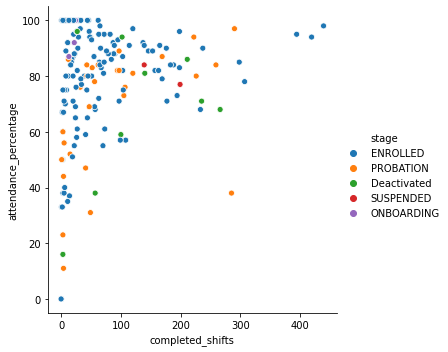

In [47]:
sns.relplot(x= 'completed_shifts', y='attendance_percentage', hue='stage', data=data2)

The stage of the customers onboarding does not directly impact the number of completed shifts

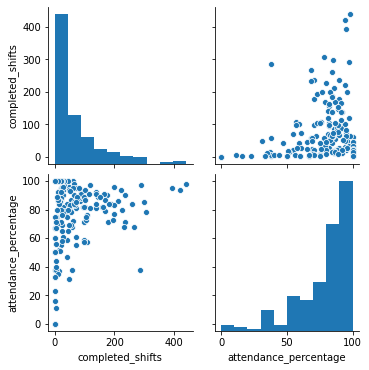

In [50]:
sns.pairplot(data2)

<AxesSubplot:xlabel='charge'>

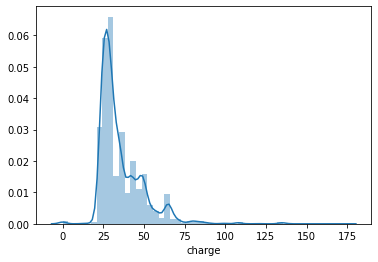

In [51]:
sns.distplot(data['charge'])

In [141]:
data2_num = data2.select_dtypes(include = ['float64', 'int64'])
data2_num.head()

,completed_shifts,attendance_percentage
0,177,71
1,32,76
2,188,84
3,198,96
4,39,80


In [142]:
data2_num_corr = data2_num.corr()['completed_shifts'][:-1]
golden_features_list = data2_num_corr[abs(data2_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Completed Shifts:\n{}".format(len(golden_features_list), golden_features_list))

There is 1 strongly correlated values with Completed Shifts:
completed_shifts    1.0
Name: completed_shifts, dtype: float64


Quantitative Analysis

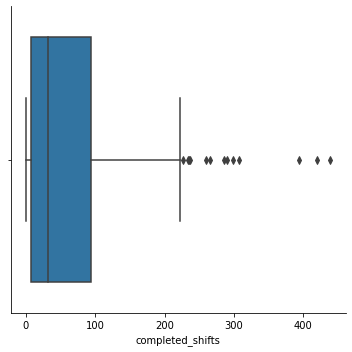

In [54]:
sns.catplot(x='completed_shifts', kind= 'box', data= data2)

<AxesSubplot:>

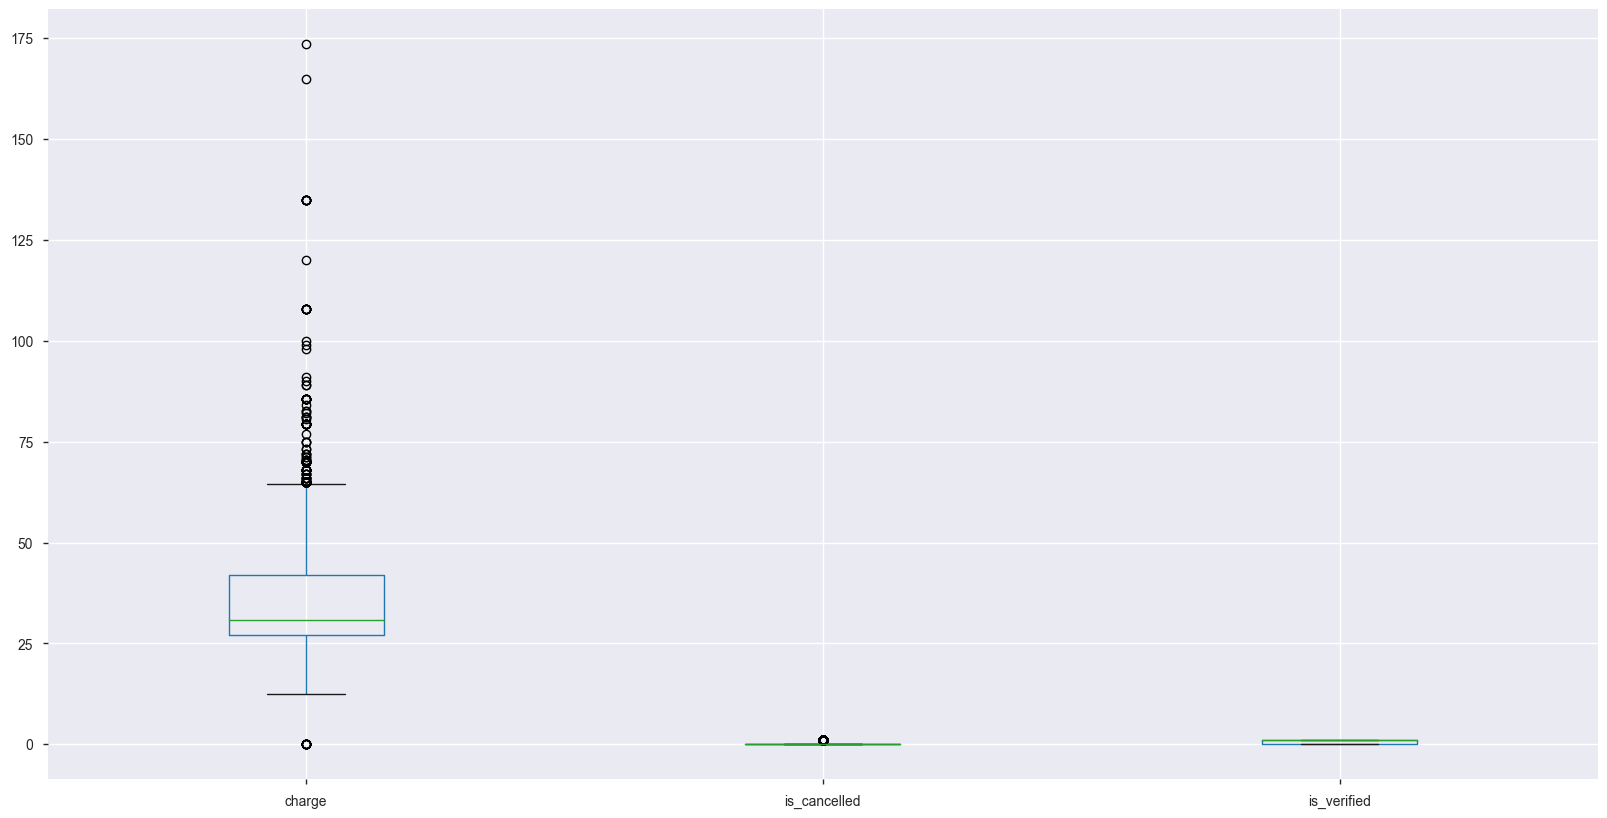

In [74]:
plt.figure(figsize=(20,10))
data.boxplot()

<AxesSubplot:>

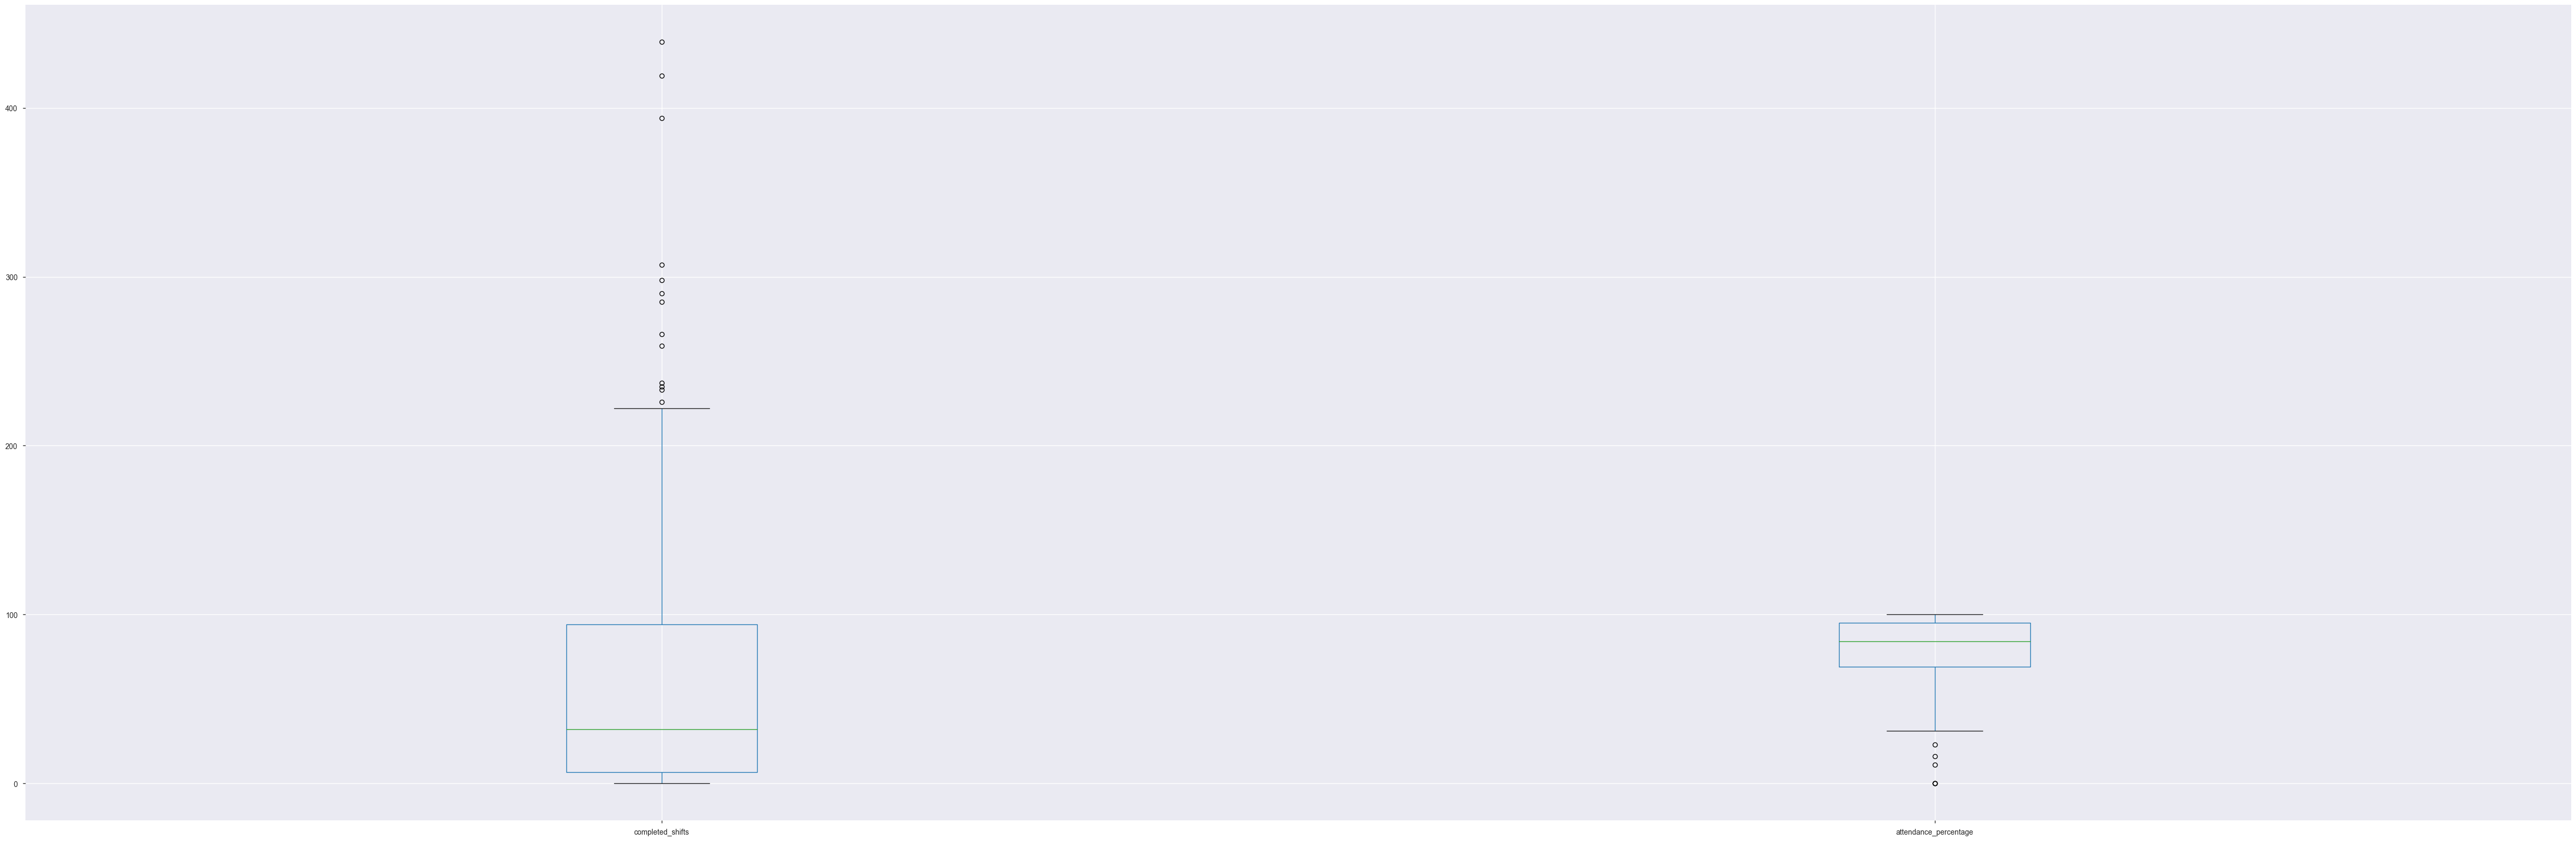

In [82]:
plt.figure(figsize=(62,20))
data2.boxplot()

In [158]:
out_per=[]
for i in data2_num:
    data_mean, data_std = mean(data2[i]), std(data2[i])
# identify outliers
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print(i,': \n')
# identify outliers
    outliers = [x for x in data2[i] if x < lower or x > upper]
    
    num_out=len(outliers)
    print('Identified outliers: %d' % num_out)
    outliers_removed = [x for x in data2[i] if x >= lower and x <= upper]
    num_nout=len(outliers_removed)
    print('Non-outlier observations: %d' % num_nout)
    outlier_percent=(num_out/(num_out+num_nout))*100
    print('Percent of outlers:',outlier_percent ,'\n')
    out_per.append(outlier_percent)

completed_shifts : 

Identified outliers: 3
Non-outlier observations: 197
Percent of outlers: 1.5 

attendance_percentage : 

Identified outliers: 4
Non-outlier observations: 196
Percent of outlers: 2.0 



In [159]:
Outliers=pd.DataFrame({'Feature':data2_num,'% Of Outliers':out_per})
outlier_sorted=Outliers.sort_values('% Of Outliers',ascending=False)
outlier_sorted

,Feature,% Of Outliers
1,"(a, t, t, e, n, d, a, n, c, e, _, p, e, r, c, ...",2.0
0,"(c, o, m, p, l, e, t, e, d, _, s, h, i, f, t, s)",1.5


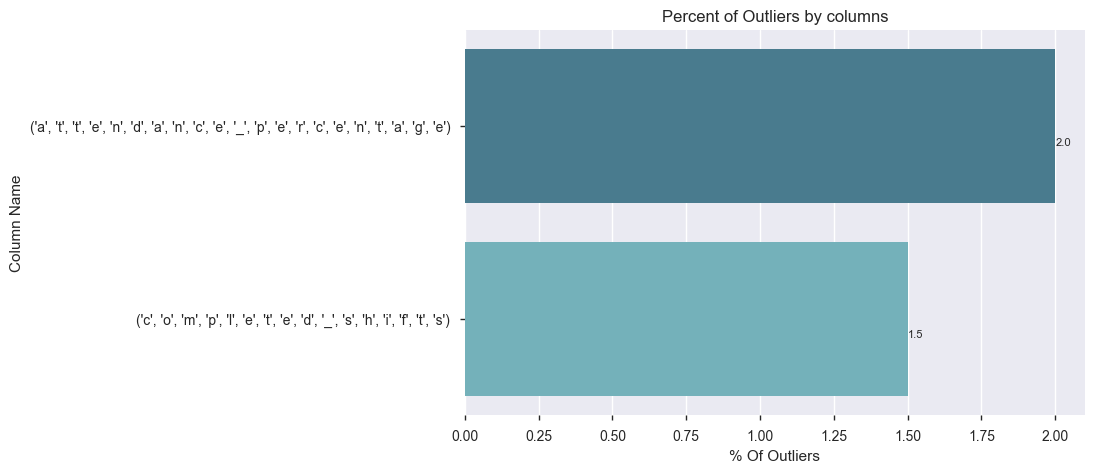

In [160]:
plt.figure(figsize=(8,5))
sns.barplot(y=outlier_sorted['Feature'],x=outlier_sorted['% Of Outliers'],palette='GnBu_d')
plt.title('Percent of Outliers by columns')
plt.ylabel('Column Name')
for i, v in enumerate(list(outlier_sorted['% Of Outliers'])):
    plt.text(v,i-(-0.1),round(list(outlier_sorted['% Of Outliers'])[i],2),fontsize=8)